In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [3]:
df=pd.DataFrame({'salary':[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
                'experience':[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]})

In [4]:
x=df[['experience']].values
y=df['salary'].values.reshape(-1,1)

In [5]:
errors=[]

In [6]:
np.random.seed(0)
B0 = np.random.rand()
B1 = np.random.rand()
learning_rate = 0.01
epochs = 5
iterations = 60

errors = []

def compute_error(B0, B1, x, y):
    predictions = B0 + B1 * x
    return np.mean((y - predictions) ** 2)

for epoch in range(epochs):
    for i in range(len(x)):
        Y_pred = B0 + B1 * x[i]
        error = Y_pred - y[i]
        
        B0 = B0 - learning_rate * error
        B1 = B1 - learning_rate * error * x[i]
        current_error = compute_error(B0, B1, x, y)
        errors.append(current_error)

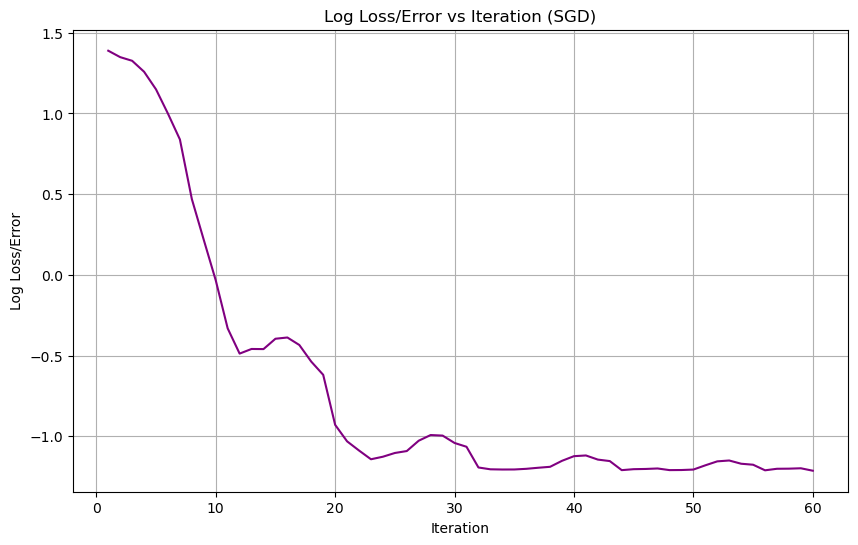

(array([0.72446187]), array([1.32307646]), 0.29709301438851604)

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), np.log(errors), color='purple')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Iteration (SGD)')
plt.grid(True)
plt.show()

B0, B1, errors[-1]

In [8]:
sgd_reg = SGDRegressor(max_iter=iterations, eta0=learning_rate, penalty=None, tol=1e-6)

X_reshaped = x.reshape(-1, 1)
sgd_reg.fit(X_reshaped, y)

B0_sklearn = sgd_reg.intercept_[0]
B1_sklearn = sgd_reg.coef_[0]

Y_pred_sklearn = sgd_reg.predict(X_reshaped)
error_sklearn = mean_squared_error(y, Y_pred_sklearn)

B0_sklearn, B1_sklearn, error_sklearn

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.39233663023621634, 1.4297465353679801, 0.25377504626681635)

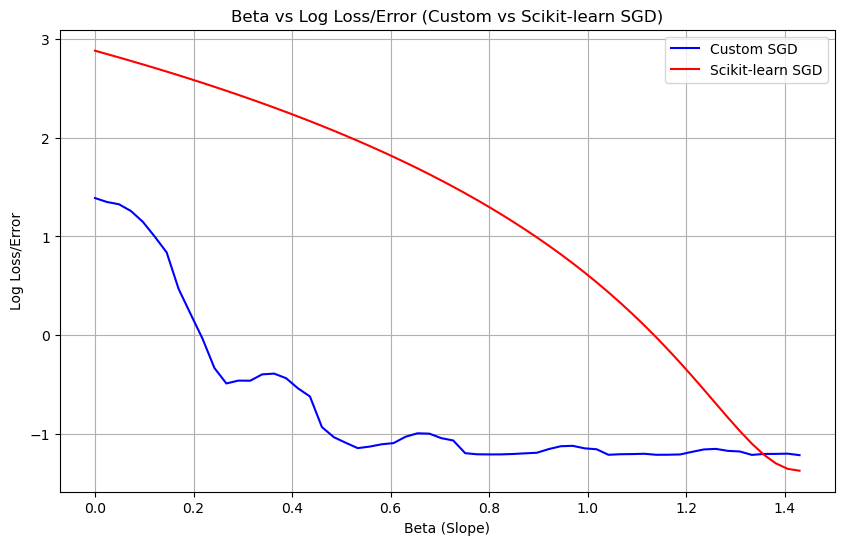

In [9]:
beta_range = np.linspace(0, B1_sklearn, len(errors))
log_error_sklearn = [np.log(compute_error(B0_sklearn, beta, x,y)) for beta in beta_range]

plt.figure(figsize=(10, 6))
plt.plot(beta_range, np.log(errors), color='blue', label='Custom SGD')
plt.plot(beta_range, log_error_sklearn, color='red', label='Scikit-learn SGD')
plt.xlabel('Beta (Slope)')
plt.ylabel('Log Loss/Error')
plt.title('Beta vs Log Loss/Error (Custom vs Scikit-learn SGD)')
plt.legend()
plt.grid(True)
plt.show()

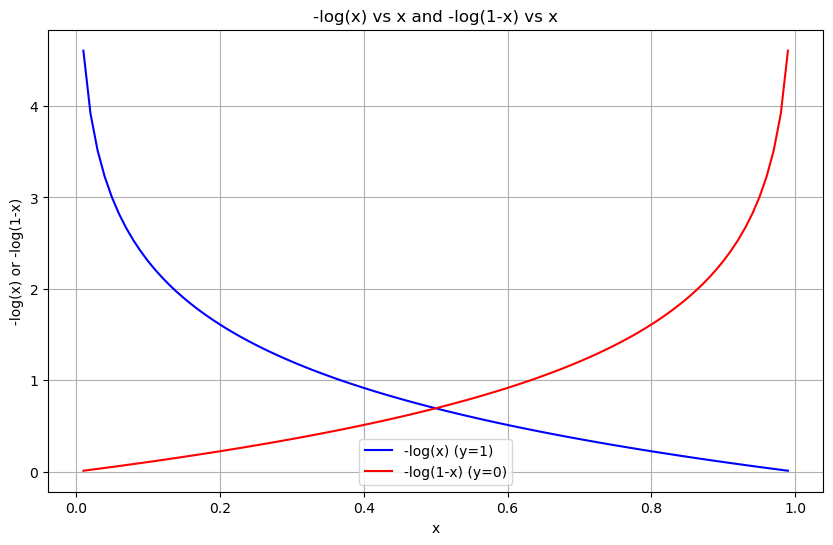

In [10]:
x_values = np.linspace(0.01, 0.99, 100)

log_x = -np.log(x_values)
log_1_x = -np.log(1 - x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, log_x, color='blue', label='-log(x) (y=1)')
plt.plot(x_values, log_1_x, color='red', label='-log(1-x) (y=0)')
plt.xlabel('x')
plt.ylabel('-log(x) or -log(1-x)')
plt.title('-log(x) vs x and -log(1-x) vs x')
plt.legend()
plt.grid(True)
plt.show()